# Степанов Никита 6210, лабораторная 3, 15 вариант

In [2]:
import math
import numpy as np

1. Создать квадратную матрицу из случайных целых чисел из [3,9] размера 5 . Найти ее определитель, используя LU разложение.

In [4]:
A = np.random.randint(3, 10, (5, 5))
A

array([[3, 5, 9, 8, 7],
       [9, 9, 4, 9, 7],
       [4, 9, 5, 8, 4],
       [9, 6, 3, 3, 8],
       [6, 3, 7, 7, 4]])

In [3]:
L = np.identity(5, float)  # нижняя унитреугольная матрица
U = np.zeros((5, 5), float)  # верхняя треугольная матрица
for i in range(5):
    for j in range(5):
        if i > j:
            L[i, j] = (A[i, j] - np.dot(L[i, :j], U[:j, j])) / U[j, j]
        else:
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
print(L)
print(U)

[[ 1.          0.          0.          0.          0.        ]
 [ 1.25        1.          0.          0.          0.        ]
 [ 0.75        0.4         1.          0.          0.        ]
 [ 1.          0.6         0.52542373  1.          0.        ]
 [ 2.          2.4        -0.61016949 35.          1.        ]]
[[ 4.          8.          9.          8.          9.        ]
 [ 0.         -5.         -4.25       -7.         -5.25      ]
 [ 0.          0.          2.95        3.8         0.35      ]
 [ 0.          0.          0.          0.20338983 -0.03389831]
 [ 0.          0.          0.          0.          4.        ]]


In [4]:
det = 1
for i in range(5):
    det *= U[i,i]
det

-48.00000000000002

In [5]:
# проверка
np.linalg.det(A)

-48.00000000000007

2. Найдите QR разложение матрицы, созданной в пункте 1. Проверьте правильность найденного разложения 1) с помощью умножения Q на R 2) с помощью функции np.linalg. qr.

In [6]:
Q = np.identity(5, float)  # Q — унитарная матрица размера nxn
# Q - ортонормированная матрица
R = np.zeros((5, 5), float)  # R — верхнетреугольная матрица размера nxn.
#R = Q^-1 * A

In [7]:
def gram_schmidt(X):
    N = X.shape[0]
    B = np.zeros((N, N), float)
    for i in range(N):
        B[:, i] = X[:, i]  # инициализируем начальным вектором
        for j in range(i):
            # вычисляем коэф = отношению скалярных произведений, а также умножаем это на веткор из предыдущей итерации
            B[:, i] -= np.dot(X[:, i], B[:, j]) / \
                np.dot(B[:, j], B[:, j]) * B[:, j]
    # ортонормируем
    for i in range(N):
        B[:, i] /= np.linalg.norm(B[:, i])
    return B


Q = gram_schmidt(A).round(4)
Q

array([[ 0.3508,  0.7403, -0.4773,  0.2944,  0.1201],
       [ 0.4385,  0.0599, -0.0459, -0.8557,  0.2642],
       [ 0.2631,  0.209 ,  0.7856,  0.2482,  0.4564],
       [ 0.3508,  0.221 ,  0.3382, -0.0825, -0.8408],
       [ 0.7016, -0.5965, -0.1963,  0.3358,  0.024 ]])

In [8]:
# проверка на то, что матрица ортонормированная
Qt = np.transpose(Q)
np.dot(Q, Qt).round()
# равна единичной => ортонормированная

array([[ 1., -0., -0., -0., -0.],
       [-0.,  1.,  0., -0., -0.],
       [-0.,  0.,  1., -0.,  0.],
       [-0., -0., -0.,  1.,  0.],
       [-0., -0.,  0.,  0.,  1.]])

In [9]:
# находим R = Qt*A
R = np.dot(Qt, A).round(2)
R

array([[11.4 , 10.61, 15.35, 10.87, 14.82],
       [-0.  ,  5.78,  6.94,  6.51,  4.62],
       [ 0.  ,  0.  ,  3.2 ,  2.79, -0.18],
       [ 0.  ,  0.  ,  0.  ,  2.37,  0.95],
       [-0.  , -0.  , -0.  , -0.  ,  0.1 ]])

1) с помощью умножения Q на R

In [10]:
print(np.dot(Q, R).round().astype(np.int64) == A)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


2) с помощью функции np.linalg.qr.

In [11]:
Q, R = np.linalg.qr(A)
print(Q.round(4), "\n", R.round(4))
print(np.dot(Q, R).round().astype(np.int64) == A)

[[-0.3508  0.7403  0.4773  0.2944 -0.1201]
 [-0.4385  0.0599  0.0459 -0.8557 -0.2642]
 [-0.2631  0.209  -0.7856  0.2482 -0.4564]
 [-0.3508  0.221  -0.3382 -0.0825  0.8408]
 [-0.7016 -0.5965  0.1963  0.3358 -0.024 ]] 
 [[-11.4018 -10.6124 -15.3485 -10.8755 -14.8223]
 [  0.       5.7773   6.9436   6.5056   4.6216]
 [  0.       0.      -3.1951  -2.7869   0.1848]
 [  0.       0.       0.       2.3735   0.9475]
 [  0.       0.       0.       0.      -0.0961]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


3. Решить систему, используя метод простых итераций с точностью до 10-3, приведя к виду, удобному для итераций 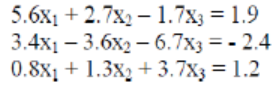

In [20]:
# преобразовал исходную матрицу, для выполнения условия сходимости следующим образом:
# из 2-ой строки вычел 1-ую и к ней же прибавил 3-юю
A = np.array([[5.6, 2.7, -1.7],
              [-1.4, -5, -1.3],
              [0.8, 1.3, 3.7]])
B = [[1.9], [-3.1], [1.2]]
# точность итераций
eps = 1e-3

# выделяем коэффициенты при искомых x, чтобы перенести потом их в знаменатель правой части
diag = (1/np.diag(A)).reshape(-1, 1)
A[np.diag_indices_from(A)] = 0.  # обнуляем диагональные элементы
# интерпретируем ситуацию, если бы выражали Xi, оставляя его в левой части, перенося все остальное в правую
A = np.hstack((-A, B)) * diag
x = A[:, -1].ravel()  # составляем нулевое приближение
x = np.append(x, 1)  # добавляем 1, учитывать в сумме приближения B/A
tmp = x + eps  # tmp - значение x при предыдущей итерации, которое нужно для отслеживания точности
it = 0
print(A)
while abs(x-tmp).max() > eps:
    tmp = x
    # print(x)
    x = np.dot(A, tmp)  # вычисление приближений
    x = np.append(x, 1)
    it += 1
# вывод
print('Итерация:', it)
print('X:', x[:-1].round(3))

[[-0.         -0.48214286  0.30357143  0.33928571]
 [-0.28        0.         -0.26        0.62      ]
 [-0.21621622 -0.35135135 -0.          0.32432432]]
Итерация: 8
X: [0.099 0.565 0.105]


In [21]:
#проверка
A = np.array([[5.6, 2.7, -1.7],
              [3.4, -3.6, -6.7],
              [0.8, 1.3, 3.7]])
B = [[1.9], [-2.4], [1.2]]
print('X:', np.linalg.solve(A,B).round(3).reshape(-1))

X: [0.098 0.565 0.104]
